In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
)

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [2]:
def read_datasets(url):
    try:
        print("Файл успешно открылся")
        df = pd.read_csv(url)
        return df
    except Exception:
        print("Ошибка при чтении файла {url}", str(Exception))
        return None
    
def view_head(url):
    df = read_datasets(url)
    return df.head()


def view_info(url):
    df = read_datasets(url)
    return df.info()    

def view_describe(url):
    df = read_datasets(url)
    return df.describe()

def exist_miss(url):
    df = read_datasets(url)
    miss = df.isna().sum().sum()
    miss_procent = (miss / df.size) * 100
    sum_mis = {"Количество пропусков" : miss,
               "Доля пропусков" : f"{miss_procent:.2f}"}
    return sum_mis

def types(url):
    df = read_datasets(url)
    return df.dtypes

def create_pca_only(pca_dim=None):
    """Pipeline ТОЛЬКО с PCA (без StandardScaler)"""
    from sklearn.pipeline import Pipeline
    from sklearn.decomposition import PCA
    
    steps = []
    if pca_dim is not None:
        steps.append(('pca', PCA(n_components=pca_dim, random_state=RANDOM_STATE)))
    
    return Pipeline(steps) if steps else None
    

In [3]:
url1 = r'.\data\datasets\S07-hw-dataset-01.csv'
url2 = r'.\data\datasets\S07-hw-dataset-02.csv'
url3 = r'.\data\datasets\S07-hw-dataset-03.csv'
df1 = read_datasets(url1)
df2 = read_datasets(url2)
df3 = read_datasets(url3)


Файл успешно открылся
Файл успешно открылся
Файл успешно открылся


In [4]:
view_head(url1)

Файл успешно открылся


,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


In [5]:
view_head(url2)

Файл успешно открылся


,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


In [6]:
view_head(url3)

Файл успешно открылся


,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


In [7]:
view_info(url1)

Файл успешно открылся
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [8]:
view_info(url2)

Файл успешно открылся
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


In [9]:
view_info(url3)

Файл успешно открылся
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


In [10]:
view_describe(url1)

Файл успешно открылся


,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


In [11]:
view_describe(url2)

Файл успешно открылся


,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


In [12]:
view_describe(url3)

Файл успешно открылся


,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865


In [13]:
#количество пропусков датасете
print(exist_miss(url1))
print(exist_miss(url2))
print(exist_miss(url3))

Файл успешно открылся
{'Количество пропусков': np.int64(0), 'Доля пропусков': '0.00'}
Файл успешно открылся
{'Количество пропусков': np.int64(0), 'Доля пропусков': '0.00'}
Файл успешно открылся
{'Количество пропусков': np.int64(0), 'Доля пропусков': '0.00'}


In [14]:
types(url1)

Файл успешно открылся


sample_id      int64
f01          float64
f02          float64
f03          float64
f04          float64
f05          float64
f06          float64
f07          float64
f08          float64
dtype: object

In [15]:
types(url2)

Файл успешно открылся


sample_id      int64
x1           float64
x2           float64
z_noise      float64
dtype: object

In [16]:
types(url3)

Файл успешно открылся


sample_id      int64
x1           float64
x2           float64
f_corr       float64
f_noise      float64
dtype: object

In [17]:
X1 = df1[df1.columns[1:]]
y1 = df1[df1.columns[0]]

X2 = df2[df2.columns[1:]]
y2 = df2[df2.columns[0]]

X3 = df3[df3.columns[1:]]
y3 = df3[df3.columns[0]]
X1

,f01,f02,f03,f04,f05,f06,f07,f08
0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213
...,...,...,...,...,...,...,...,...
11995,15.358432,56.974156,-1.089617,-95.891749,8.909345,26.123207,-20.786813,-0.681086
11996,-5.781842,71.198182,-0.201762,-54.336472,4.903560,-3.287724,-48.875539,0.172566
11997,-7.573306,70.017900,-0.159869,17.167497,-3.809988,-5.356308,-98.751869,0.836130
11998,13.856888,88.341387,-1.429989,-101.905925,10.759963,29.308895,-19.837802,0.300104


In [ ]:
kmeans_ks = list(range(2,31))
dbscan_eps1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2]
dbscan_min_samples1 = [3, 5, 10, 15]
    
dbscan_eps2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2]
dbscan_min_samples2 = [3, 5, 10, 15]


dbscan_eps3 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2]
dbscan_min_samples3 = [3, 5, 10, 15]

In [ ]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()

# Нормализация
X_scaled1 = scaler1.fit_transform(X1)
X_scaled2 = scaler2.fit_transform(X2)
X_scaled3 = scaler3.fit_transform(X3)


X_feat1 = X_scaled1  # ТОЛЬКО PCA
X_feat2 = X_scaled2
X_feat3 = X_scaled3
print(f"X1: {X1.shape} -> {X_feat1.shape}")
print(f"X2: {X2.shape} -> {X_feat2.shape}")
print(f"X3: {X3.shape} -> {X_feat3.shape}")

X1: (12000, 8) -> (12000, 8)
X2: (8000, 3) -> (8000, 3)
X3: (15000, 4) -> (15000, 4)


In [20]:
def safe_cluster_metrics(X, labels):
    """Считает метрики; возвращает None, если метрика неприменима."""
    unique = np.unique(labels)
    if len(unique) < 2:
        return None
    if len(unique) == 1:
        return None
    try:
        sil = float(silhouette_score(X, labels))
    except Exception:
        sil = None
    try:
        db = float(davies_bouldin_score(X, labels))
    except Exception:
        db = None
    try:
        ch = float(calinski_harabasz_score(X, labels))
    except Exception:
        ch = None
    return {"silhouette": sil, "davies_bouldin": db, "calinski_harabasz": ch}

def pca_2d_for_plot(X_scaled, random_state=RANDOM_STATE):
    """PCA(2D) именно для визуализации."""
    p = PCA(n_components=2, random_state=random_state)
    return p.fit_transform(X_scaled)

def plot_2d_embedding(emb2d, labels, title):
    plt.figure(figsize=(7, 5))
    plt.scatter(emb2d[:, 0], emb2d[:, 1], c=labels, s=18)
    plt.title(title)
    plt.xlabel("dim-1")
    plt.ylabel("dim-2")
    plt.grid(True, alpha=0.2)
    plt.show()

def summarize_labels(labels):
    unique, counts = np.unique(labels, return_counts=True)
    return dict(zip(unique.tolist(), counts.tolist()))


In [21]:
def eval_kmeans_grid(X_feat, ks):
    results = []
    for k in ks:
        try:
            model = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init="auto")
        except TypeError:
            model = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
        
        labels = model.fit_predict(X_feat)
        metrics = safe_cluster_metrics(X_feat, labels)

        results.append({
            "algo": "kmeans",
            "params": {"k": k},
            "labels": labels,
            "metrics": metrics,
            "inertia": float(model.inertia_),
            "n_clusters": len(np.unique(labels)),
            "noise_frac": 0.0,
        })
    return results

kmeans_results1 = eval_kmeans_grid(X_feat1, kmeans_ks)
kmeans_results2 = eval_kmeans_grid(X_feat2, kmeans_ks)
kmeans_results3 = eval_kmeans_grid(X_feat3, kmeans_ks)
len(kmeans_results1), kmeans_results1[0]["params"], kmeans_results1[-1]["params"]
len(kmeans_results2), kmeans_results2[0]["params"], kmeans_results2[-1]["params"]
len(kmeans_results3), kmeans_results3[0]["params"], kmeans_results3[-1]["params"]
    
    

(29, {'k': 2}, {'k': 30})

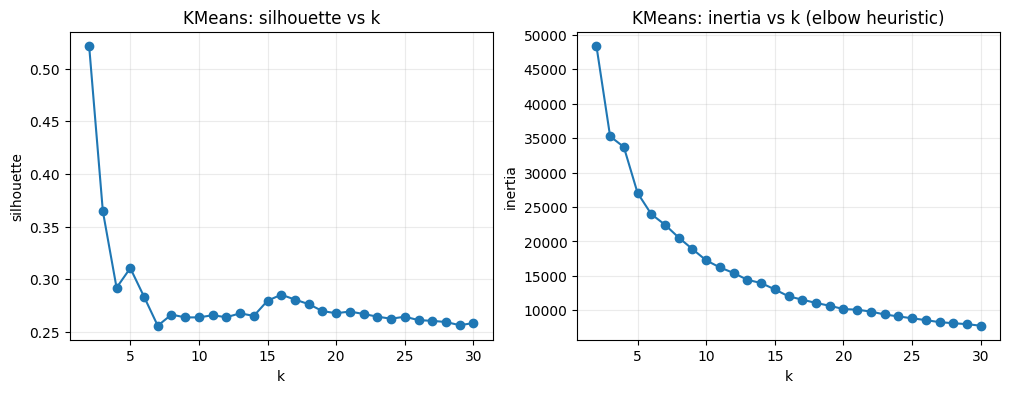

<Figure size 640x480 with 0 Axes>

In [22]:
def plot_silhoette_VS_k(kmeans_results):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ks = [r["params"]["k"] for r in kmeans_results]
    sil = [r["metrics"]["silhouette"] if r["metrics"] else None for r in kmeans_results]

    ax1.plot(ks, sil, marker="o")
    ax1.set_title("KMeans: silhouette vs k")
    ax1.set_xlabel("k")
    ax1.set_ylabel("silhouette")
    ax1.grid(True, alpha=0.25)
    plt.close()

    # Инерция (elbow) – как эвристика
    inertia = [r["inertia"] for r in kmeans_results]
    ax2.plot(ks, inertia, marker="o")
    ax2.set_title("KMeans: inertia vs k (elbow heuristic)")
    ax2.set_xlabel("k")
    ax2.set_ylabel("inertia")
    ax2.grid(True, alpha=0.25)
    plt.tight_layout()
    return fig

plot_silhoette_VS_k(kmeans_results1)


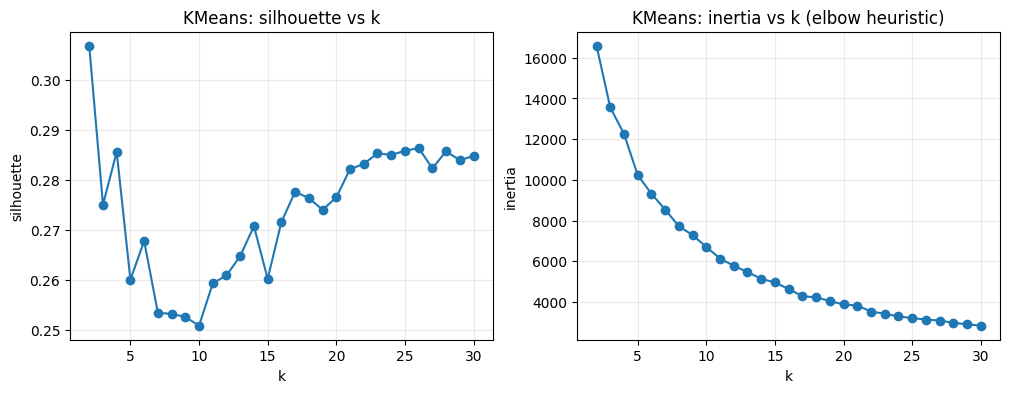

<Figure size 640x480 with 0 Axes>

In [23]:
plot_silhoette_VS_k(kmeans_results2)


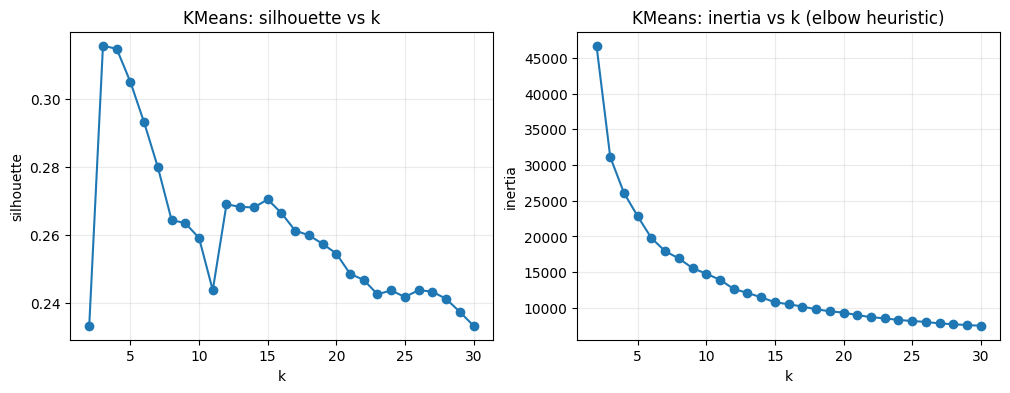

<Figure size 640x480 with 0 Axes>

In [24]:
plot_silhoette_VS_k(kmeans_results3)

In [25]:
def pick_best_by_silhouette(results):
    best = None
    best_score = -np.inf
    for r in results:
        m = r["metrics"]
        if m is None:
            continue
        s = m["silhouette"]
        if s is None:
            continue
        if s > best_score:
            best_score = s
            best = r
    return best, best_score

best_kmeans1, best_kmeans_s1 = pick_best_by_silhouette(kmeans_results1)
best_kmeans2, best_kmeans_s2 = pick_best_by_silhouette(kmeans_results2)
best_kmeans3, best_kmeans_s3 = pick_best_by_silhouette(kmeans_results3)
print(best_kmeans1["params"], round(best_kmeans_s1, 3))
print(best_kmeans2["params"], round(best_kmeans_s2, 3))
print(best_kmeans3["params"], round(best_kmeans_s3, 3))
best_kmeans2

{'k': 2} 0.522
{'k': 2} 0.307
{'k': 3} 0.316


{'algo': 'kmeans',
 'params': {'k': 2},
 'labels': array([0, 1, 1, ..., 1, 0, 0], shape=(8000,), dtype=int32),
 'metrics': {'silhouette': 0.3068610017701601,
  'davies_bouldin': 1.3234721699867644,
  'calinski_harabasz': 3573.3933329348392},
 'inertia': 16588.50103229558,
 'n_clusters': 2,
 'noise_frac': 0.0}

In [26]:
def eval_dbscan_grid(X_feat, eps_list, min_samples_list):
    results = []

    for eps in eps_list:
        for ms in min_samples_list:
            model = DBSCAN(eps=eps, min_samples=ms)
            labels = model.fit_predict(X_feat)

            noise_frac = float(np.mean(labels == -1))
            # Метрики по non-noise
            mask = labels != -1
            labels_nn = labels[mask]
            X_nn = X_feat[mask]

            # Перенумеруем метки non-noise, чтобы метрики работали корректнее (не обязательно, но аккуратно)
            if len(labels_nn) > 0:
                uniq = np.unique(labels_nn)
                mapping = {u: i for i, u in enumerate(uniq)}
                labels_nn = np.array([mapping[v] for v in labels_nn], dtype=int)

            metrics = None
            n_clusters = 0
            if len(X_nn) >= 10 and len(np.unique(labels_nn)) >= 2:
                metrics = safe_cluster_metrics(X_nn, labels_nn)
                n_clusters = len(np.unique(labels_nn))

            results.append({
                "algo": "dbscan",
                "params": {"eps": float(eps), "min_samples": int(ms)},
                "labels": labels,
                "metrics": metrics,
                "inertia": None,
                "n_clusters": int(n_clusters),
                "noise_frac": float(noise_frac),
                "n_non_noise": int(mask.sum()),
            })
    return results

dbscan_results1 = eval_dbscan_grid(X_feat1, dbscan_eps1, dbscan_min_samples1)
dbscan_results2 = eval_dbscan_grid(X_feat2, dbscan_eps2, dbscan_min_samples2)
dbscan_results3 = eval_dbscan_grid(X_feat3, dbscan_eps3, dbscan_min_samples3)
print(dbscan_results1)
print(dbscan_results2)
print(dbscan_results3)

[{'algo': 'dbscan', 'params': {'eps': 0.1, 'min_samples': 3}, 'labels': array([-1, -1, -1, ..., -1, -1, -1], shape=(12000,)), 'metrics': None, 'inertia': None, 'n_clusters': 0, 'noise_frac': 0.99975, 'n_non_noise': 3}, {'algo': 'dbscan', 'params': {'eps': 0.1, 'min_samples': 5}, 'labels': array([-1, -1, -1, ..., -1, -1, -1], shape=(12000,)), 'metrics': None, 'inertia': None, 'n_clusters': 0, 'noise_frac': 1.0, 'n_non_noise': 0}, {'algo': 'dbscan', 'params': {'eps': 0.1, 'min_samples': 10}, 'labels': array([-1, -1, -1, ..., -1, -1, -1], shape=(12000,)), 'metrics': None, 'inertia': None, 'n_clusters': 0, 'noise_frac': 1.0, 'n_non_noise': 0}, {'algo': 'dbscan', 'params': {'eps': 0.1, 'min_samples': 15}, 'labels': array([-1, -1, -1, ..., -1, -1, -1], shape=(12000,)), 'metrics': None, 'inertia': None, 'n_clusters': 0, 'noise_frac': 1.0, 'n_non_noise': 0}, {'algo': 'dbscan', 'params': {'eps': 0.2, 'min_samples': 3}, 'labels': array([ 0, -1, -1, ..., -1, -1, -1], shape=(12000,)), 'metrics': {

In [27]:

# Посмотрим, какие варианты вообще дали >=2 кластера (без шума) и посчитали silhouette
valid1 = [r for r in dbscan_results1 if r["metrics"] is not None and r["metrics"]["silhouette"] is not None]
print("Valid DBSCAN configs:", len(valid1))

# Сортировка по silhouette
valid_sorted1 = sorted(valid1, key=lambda r: r["metrics"]["silhouette"], reverse=True)
for r in valid_sorted1[:8]:
    print(r["params"], "sil=", round(r["metrics"]["silhouette"], 3), "noise=", round(r["noise_frac"], 3), "clusters=", r["n_clusters"])

valid2 = [r for r in dbscan_results2 if r["metrics"] is not None and r["metrics"]["silhouette"] is not None]
print("Valid DBSCAN configs:", len(valid2))

# Сортировка по silhouette
valid_sorted2 = sorted(valid2, key=lambda r: r["metrics"]["silhouette"], reverse=True)
for r in valid_sorted2[:8]:
    print(r["params"], "sil=", round(r["metrics"]["silhouette"], 3), "noise=", round(r["noise_frac"], 3), "clusters=", r["n_clusters"])
    
valid3 = [r for r in dbscan_results3 if r["metrics"] is not None and r["metrics"]["silhouette"] is not None]
print("Valid DBSCAN configs:", len(valid3))

# Сортировка по silhouette
valid_sorted3 = sorted(valid3, key=lambda r: r["metrics"]["silhouette"], reverse=True)
for r in valid_sorted3[:8]:
    print(r["params"], "sil=", round(r["metrics"]["silhouette"], 3), "noise=", round(r["noise_frac"], 3), "clusters=", r["n_clusters"])


Valid DBSCAN configs: 40
{'eps': 0.2, 'min_samples': 15} sil= 0.876 noise= 0.997 clusters= 2
{'eps': 0.5, 'min_samples': 15} sil= 0.399 noise= 0.092 clusters= 5
{'eps': 0.6, 'min_samples': 15} sil= 0.388 noise= 0.03 clusters= 5
{'eps': 0.6, 'min_samples': 10} sil= 0.385 noise= 0.019 clusters= 5
{'eps': 1.0, 'min_samples': 10} sil= 0.384 noise= 0.001 clusters= 4
{'eps': 1.0, 'min_samples': 15} sil= 0.384 noise= 0.001 clusters= 4
{'eps': 1.0, 'min_samples': 3} sil= 0.384 noise= 0.001 clusters= 4
{'eps': 1.0, 'min_samples': 5} sil= 0.384 noise= 0.001 clusters= 4
Valid DBSCAN configs: 23
{'eps': 0.1, 'min_samples': 10} sil= 0.581 noise= 0.918 clusters= 46
{'eps': 0.8, 'min_samples': 15} sil= 0.545 noise= 0.038 clusters= 2
{'eps': 0.9, 'min_samples': 15} sil= 0.493 noise= 0.015 clusters= 2
{'eps': 0.8, 'min_samples': 10} sil= 0.414 noise= 0.012 clusters= 2
{'eps': 0.7, 'min_samples': 15} sil= 0.349 noise= 0.051 clusters= 2
{'eps': 0.7, 'min_samples': 3} sil= 0.346 noise= 0.007 clusters= 2
{

In [42]:

best_dbscan1 = valid_sorted1[4] if valid_sorted1 else None
print(best_dbscan1["params"] if best_dbscan1 else "No valid config found")


best_dbscan2 = valid_sorted2[1] if valid_sorted2 else None
print(best_dbscan2["params"] if best_dbscan2 else "No valid config found")


best_dbscan3 = valid_sorted3[2] if valid_sorted3 else None
print(best_dbscan3["params"] if best_dbscan3 else "No valid config found")


{'eps': 1.0, 'min_samples': 10}
{'eps': 0.8, 'min_samples': 15}
{'eps': 0.8, 'min_samples': 3}


In [43]:
def print_result_card(name, result):
    m = result["metrics"] or {}
    print("=" * 72)
    print(f"{name}")
    print("algo:", result["algo"])
    print("params:", result["params"])
    print("n_clusters:", result.get("n_clusters"))
    if result["algo"] == "dbscan":
        print("noise_frac:", round(result.get("noise_frac", 0.0), 3), " non-noise:", result.get("n_non_noise"))
    print("metrics:")
    print("  silhouette:", None if m.get("silhouette") is None else round(m["silhouette"], 3))
    print("  davies_bouldin:", None if m.get("davies_bouldin") is None else round(m["davies_bouldin"], 3))
    print("  calinski_harabasz:", None if m.get("calinski_harabasz") is None else round(m["calinski_harabasz"], 1))
    if result.get("inertia") is not None:
        print("  inertia:", round(result["inertia"], 1))

print_result_card("BEST KMEANS (by silhouette)", best_kmeans1)
if best_dbscan1 is not None:
    print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan1)


BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 2}
n_clusters: 2
metrics:
  silhouette: 0.522
  davies_bouldin: 0.685
  calinski_harabasz: 11787.0
  inertia: 48425.9
BEST DBSCAN (by silhouette among valid)
algo: dbscan
params: {'eps': 1.0, 'min_samples': 10}
n_clusters: 4
noise_frac: 0.001  non-noise: 11992
metrics:
  silhouette: 0.384
  davies_bouldin: 1.159
  calinski_harabasz: 9460.9


In [44]:
print_result_card("BEST KMEANS (by silhouette)", best_kmeans2)
if best_dbscan2 is not None:
    print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan2)

BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 2}
n_clusters: 2
metrics:
  silhouette: 0.307
  davies_bouldin: 1.323
  calinski_harabasz: 3573.4
  inertia: 16588.5
BEST DBSCAN (by silhouette among valid)
algo: dbscan
params: {'eps': 0.8, 'min_samples': 15}
n_clusters: 2
noise_frac: 0.038  non-noise: 7693
metrics:
  silhouette: 0.545
  davies_bouldin: 0.472
  calinski_harabasz: 135.0


In [45]:
print_result_card("BEST KMEANS (by silhouette)", best_kmeans3)
if best_dbscan3 is not None:
    print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan3)

BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 3}
n_clusters: 3
metrics:
  silhouette: 0.316
  davies_bouldin: 1.158
  calinski_harabasz: 6957.2
  inertia: 31123.5
BEST DBSCAN (by silhouette among valid)
algo: dbscan
params: {'eps': 0.8, 'min_samples': 3}
n_clusters: 2
noise_frac: 0.001  non-noise: 14978
metrics:
  silhouette: 0.373
  davies_bouldin: 0.551
  calinski_harabasz: 17.2


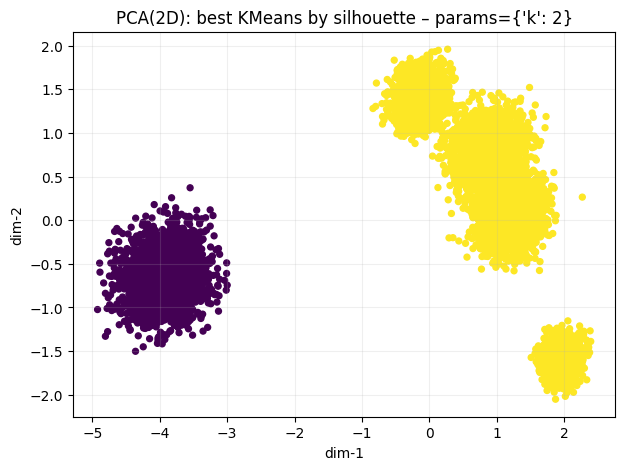

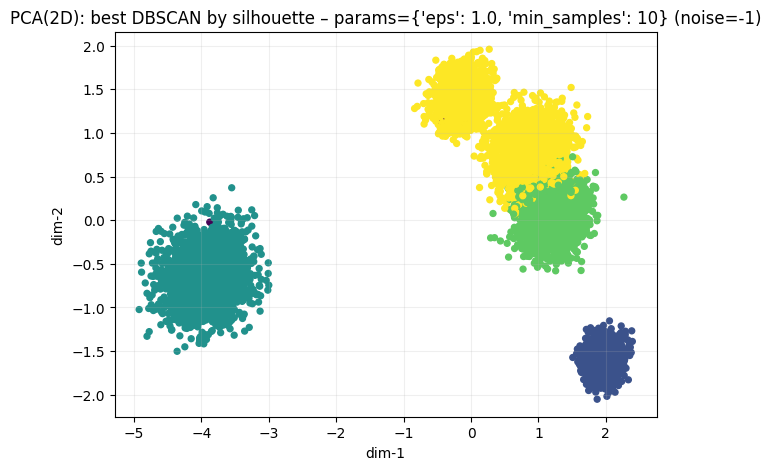

In [46]:

X_plot2d = pca_2d_for_plot(X_scaled1, random_state=RANDOM_STATE)

# KMeans best
plot_2d_embedding(
    X_plot2d, best_kmeans1["labels"],
    title=f"PCA(2D): best KMeans by silhouette – params={best_kmeans1['params']}"
)

# DBSCAN best (if exists)
if best_dbscan1 is not None:
    plot_2d_embedding(
        X_plot2d, best_dbscan1["labels"],
        title=f"PCA(2D): best DBSCAN by silhouette – params={best_dbscan1['params']} (noise=-1)"
    )

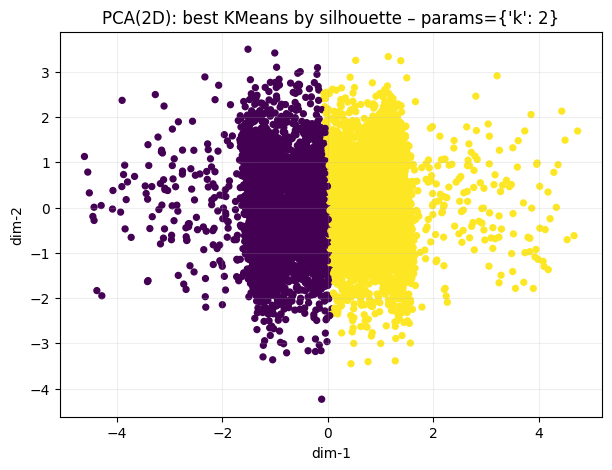

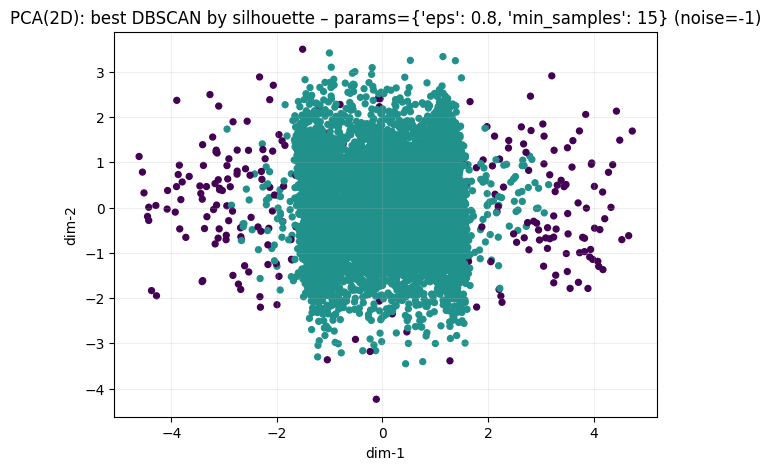

In [47]:
X_plot2d = pca_2d_for_plot(X_scaled2, random_state=RANDOM_STATE)

# KMeans best
plot_2d_embedding(
    X_plot2d, best_kmeans2["labels"],
    title=f"PCA(2D): best KMeans by silhouette – params={best_kmeans2['params']}"
)

# DBSCAN best (if exists)
if best_dbscan2 is not None:
    plot_2d_embedding(
        X_plot2d, best_dbscan2["labels"],
        title=f"PCA(2D): best DBSCAN by silhouette – params={best_dbscan2['params']} (noise=-1)"
    )

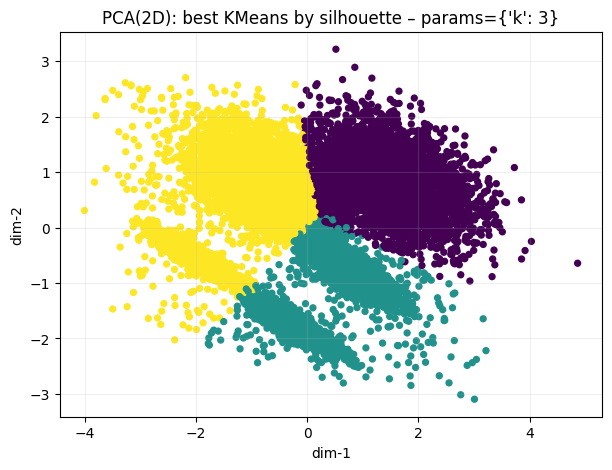

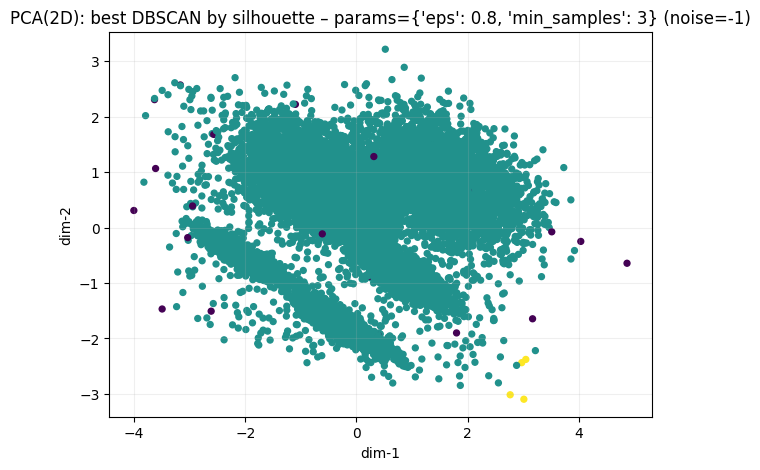

In [48]:
X_plot2d = pca_2d_for_plot(X_scaled3, random_state=RANDOM_STATE)

# KMeans best
plot_2d_embedding(
    X_plot2d, best_kmeans3["labels"],
    title=f"PCA(2D): best KMeans by silhouette – params={best_kmeans3['params']}"
)

# DBSCAN best (if exists)
if best_dbscan3 is not None:
    plot_2d_embedding(
        X_plot2d, best_dbscan3["labels"],
        title=f"PCA(2D): best DBSCAN by silhouette – params={best_dbscan3['params']} (noise=-1)"
    )

In [35]:
def eval_kmeans_grid(X_feat, ks):
    results = []
    for k in ks:
        try:
            model = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init="auto")
        except TypeError:
            model = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
        
        labels = model.fit_predict(X_feat)
        metrics = safe_cluster_metrics(X_feat, labels)

        results.append({
            "algo": "kmeans",
            "params": {"k": k},
            "labels": labels,   
            "metrics": metrics,
            "inertia": float(model.inertia_),
            "n_clusters": len(np.unique(labels)),
            "noise_frac": 0.0,
        })
    return results

In [ ]:
def eval_kmeans_grid_rng(X_feat, ks, n_runs=5):
    """
    KMeans с оценкой стабильности через несколько random_state
    """
    results = []
    
    for k in ks:
        # Храним все запуски
        all_labels = []
        all_inertias = []
        
        # 5 запусков с разными random_state
        for run in range(n_runs):
            random_state = 42 + run * 100 + k
            
            try:
                model = KMeans(n_clusters=k, random_state=random_state, n_init="auto")
            except:
                model = KMeans(n_clusters=k, random_state=random_state, n_init=10)
            
            labels = model.fit_predict(X_feat)
            all_labels.append(labels)
            all_inertias.append(model.inertia_)
        
        # Вычисляем ARI между всеми парами запусков
        ari_scores = []
        for i in range(n_runs):
            for j in range(i+1, n_runs):
                ari = adjusted_rand_score(all_labels[i], all_labels[j])
                ari_scores.append(ari)
        
        # Средний ARI
        mean_ari = np.mean(ari_scores) if ari_scores else 1.0
        
        # Выбираем запуск с медианной inertia
        median_idx = np.argsort(all_inertias)[len(all_inertias)//2]
        best_labels = all_labels[median_idx]
        
        results.append({
            "algo": "kmeans",
            "params": {"k": k},
            "labels": best_labels,
            "metrics": safe_cluster_metrics(X_feat, best_labels),
            "inertia": float(all_inertias[median_idx]),
            "n_clusters": len(np.unique(best_labels)),
            "noise_frac": 0.0,
            "stability_ari": float(mean_ari),
            "ari_scores": [float(x) for x in ari_scores]
        })
    
    return results

eval_kmeans_grid_rng(X_feat1, kmeans_ks)


[{'algo': 'kmeans',
  'params': {'k': 2},
  'labels': array([1, 0, 0, ..., 1, 0, 1], shape=(12000,), dtype=int32),
  'metrics': {'silhouette': 0.5216395622404242,
   'davies_bouldin': 0.6853295219054459,
   'calinski_harabasz': 11786.95462267153},
  'inertia': 48425.906976593935,
  'n_clusters': 2,
  'noise_frac': 0.0,
  'stability_ari': 1.0,
  'ari_scores': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]},
 {'algo': 'kmeans',
  'params': {'k': 3},
  'labels': array([2, 1, 1, ..., 0, 1, 2], shape=(12000,), dtype=int32),
  'metrics': {'silhouette': 0.3646600260306961,
   'davies_bouldin': 1.1694300162128215,
   'calinski_harabasz': 10331.431843132661},
  'inertia': 35263.83364803623,
  'n_clusters': 3,
  'noise_frac': 0.0,
  'stability_ari': 1.0,
  'ari_scores': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]},
 {'algo': 'kmeans',
  'params': {'k': 4},
  'labels': array([3, 1, 1, ..., 2, 1, 0], shape=(12000,), dtype=int32),
  'metrics': {'silhouette': 0.3242421132723763,
   'davie

In [ ]:
#На основе сортировки максимальных значений silhouette были выбраны следущие методы для кластеризации для датасетов

#################################################################
#Для первого датасета выбран наилучший метод из исследуемых KMeans,Высокий silhouette: 0.522 > 0.5 → хорошее качество кластеризации
#Davies-Bouldin: 0.685 → лучше, чем у DBSCAN (чем ближе к 0, тем лучше)
#Calinski-Harabasz: 11787 → значительно выше, чем у DBSCAN → кластеры лучше разделены
#Нет шума → все точки кластеризованы
#Простая интерпретация → всего 2 кластера легче анализировать 

#################################################################
#Для второго датасета выбран наилучший метод из исследуемых DBSCAN
# Качество кластеризации значительно выше:
# Silhouette почти вдвое лучше
# Davies-Bouldin показывает в 2.8 раза лучшую разделимость
# Реалистичное выделение шума:
# 3.8% точек помечены как шум — это может быть важно
# Более естественная кластеризация:
# DBSCAN нашел те же 2 кластера, но лучше их разделил
# Алгоритм учитывает плотность, что часто лучше для реальных данных

#################################################################
#Для третьего датасета выбран наилучший метод из исследуемых DBSCAN
#2 четких кластера с отличной разделимостью
#Всего 0.1% шума — практически идеальная кластеризация
#KMeans насильно разделил на 4 кластера, что может быть искусственным
